In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #  for avoid unwanted warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML # for HTMl tag use in python

In [2]:
pd.set_option('display.max_columns',None) # to show maximum number of columns

In [3]:
data = pd.read_csv('play_tennis.csv', index_col='Unnamed: 0')

In [4]:
data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [5]:
#convert string to 0,1,2.... numric values
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [6]:
y = data.iloc[:,[-1]]
x = data.iloc[:,:-1]

In [7]:
data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=3,test_size=0.3)

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9, 4), (9, 1), (5, 4), (5, 1))

In [10]:
x.nunique()

Outlook        3
Temperature    3
Humidity       2
Wind           2
dtype: int64

# Train Naive Bayes Algorithm

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
# train classifer
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [13]:
model_accuracy=round((classifier.score(x_test,y_test)*100),2)
HTML(f'Model Accuracy : <b>{ model_accuracy }%</b>')

In [14]:
#predict model for our test data
from sklearn import metrics 

y_predict=classifier.predict(x_test)
display(HTML(f'Predicted score : <b>{model_accuracy}%</b>'))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



# Check manual data

In [15]:
x_checkdata=np.array([data.iloc[8,0:-1].values]) # take a data in array from for all indepent variable or x
y_checkdata=np.array([data.iloc[8,[-1]].values]) # take a data ina array from for depenet variable or y 

# data.iloc[4,0:-1].values ------ it means all row 4th all data expect last one  

y_predict_checkdata=classifier.predict(x_checkdata)

if y_predict_checkdata == 0:
    display(HTML(f'I am <b>{model_accuracy}%</b> Sure, that match will be <b>Cancel</b>'))
else:
    display(HTML(f'I am <b>{model_accuracy}%</b> Sure, that match will be <b>Playing</b> '))
    

# Cross verification our manual data is correct or not ?

In [16]:
# display(HTML(f'Our Above Prediction is <b>{round(metrics.accuracy_score(y_checkdata,y_predict),4)*100}%</b> Correct'))
if y_checkdata == y_predict_checkdata:
    display(HTML(f'Our Above Prediction is <b>Correct</b>'))
else:
    display(HTML(f'Our Above Prediction is <b>Wrong</b>'))

In [17]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,y_predict)
cm

array([[1, 2],
       [0, 2]], dtype=int64)

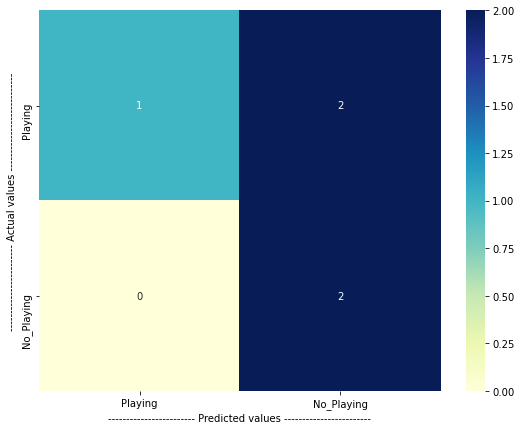

In [18]:
conf_matrix=pd.DataFrame(data=cm,columns=['Playing','No_Playing'],index=['Playing','No_Playing'])
# conf_matrix=pd.DataFrame(data=cm,columns=['Predicted: Playing','Predicted: No_Playing'],index=['Actual: Playing','Actual: No_Playing'])
plt.figure(figsize = (9,7))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");
plt.xlabel('------------------------ Predicted values ------------------------')
plt.ylabel('------------------------ Actual values ---------------------------')
plt.rcParams.update({'font.size': 18})

# why we should take gaussianNB not multinomialNB and BernouliNB ?

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
classifier_Multi = MultinomialNB()
classifier_Multi.fit(x_train,y_train)
display(HTML(f'MultinomialNB Model accuracy is <b>{round((classifier_Multi.score(x_test,y_test))*100,2)}</b>%'))

In [21]:
from sklearn.naive_bayes import BernoulliNB

In [22]:
classifier_Bernaouli = BernoulliNB()
classifier_Bernaouli.fit(x_train,y_train)
display(HTML(f'BernoulliNB Model accuracy is <b>{round((classifier_Bernaouli.score(x_test,y_test))*100,2)}</b>%')) 

# GaussinaNb have more accurate then multinomial and bernoauli 